In [1]:
import pandas as pd
import numpy as np

In [2]:
from vega_datasets import data
sf_temps = data.sf_temps()

In [3]:
sf_temps

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00
...,...,...
8754,50.4,2010-12-31 19:00:00
8755,49.9,2010-12-31 20:00:00
8756,49.4,2010-12-31 21:00:00
8757,48.8,2010-12-31 22:00:00


1. Resample by the day and take the average temperature. Visualize the average temperature over time.

In [4]:
df = sf_temps.copy()

In [5]:
df.date = pd.to_datetime(df.date)

In [6]:
df.dtypes

temp           float64
date    datetime64[ns]
dtype: object

In [7]:
df = df.set_index('date').sort_index()

In [8]:
df_mean = df.resample('D').mean()

In [9]:
df_mean.head()

,temp
date,
2010-01-01,49.170833
2010-01-02,49.304167
2010-01-03,49.391667
2010-01-04,49.445833
2010-01-05,49.491667


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='date'>

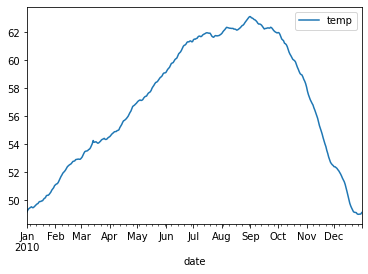

In [11]:
df_mean.plot()

<AxesSubplot:xlabel='date', ylabel='temp'>

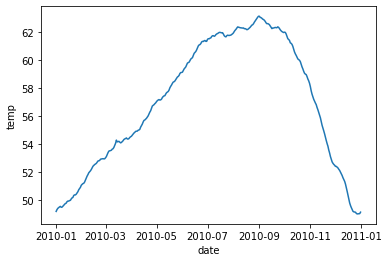

In [12]:
sns.lineplot(x=df_mean.index, y='temp', data=df_mean)

2. Write the code necessary to visualize the minimum temperature over time.

In [13]:
df_mins = df.resample('D').min()

<AxesSubplot:xlabel='date'>

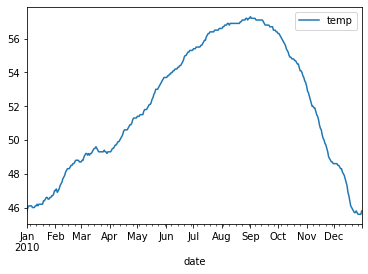

In [14]:
df_mins.plot()

3. Write the code necessary to visualize the maximum temperature over time.

In [15]:
df_maxs = df.resample('D').max()

<AxesSubplot:xlabel='date'>

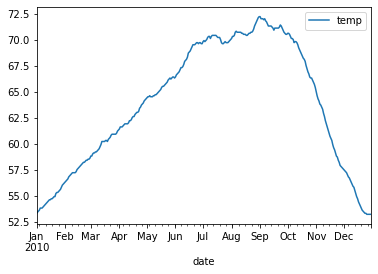

In [16]:
df_maxs.plot()

4. Which month is the coldest, on average?
5. Which month has the highest average temperature?

In [17]:
df_months = df.resample('M').mean()

In [18]:
df_months['month'] = df_months.index.month

In [19]:
df_months['month_name'] = df_months.index.month_name()

In [20]:
df_months.sort_values('temp')

,temp,month,month_name
date,,,
2010-01-31,49.984140,1,January
2010-12-31,50.498253,12,December
2010-02-28,52.243899,2,February
2010-03-31,53.956528,3,March
2010-11-30,55.185139,11,November
2010-04-30,55.633056,4,April
2010-05-31,57.970968,5,May
2010-10-31,60.253091,10,October
2010-06-30,60.444722,6,June


January is the coldest month on average, and September is the warmest on average.

6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [21]:
df_min_max = df.resample('D').agg(['min', 'max'])

In [24]:
df_min_max['range'] = df_min_max['temp']['max'] - df_min_max['temp']['min']

In [25]:
# Why does it not work with . notation?

In [26]:
df_min_max

temp       range
             min   max      
date                        
2010-01-01  45.8  53.3   7.5
2010-01-02  46.0  53.4   7.4
2010-01-03  46.1  53.5   7.4
2010-01-04  46.1  53.6   7.5
2010-01-05  46.1  53.8   7.7
...          ...   ...   ...
2010-12-27  45.6  53.2   7.6
2010-12-28  45.6  53.2   7.6
2010-12-29  45.6  53.2   7.6
2010-12-30  45.6  53.2   7.6
2010-12-31  45.8  53.2   7.4

[365 rows x 3 columns]

In [28]:
df_min_max['month_name'] = df_min_max.index.month_name()

In [36]:
df_min_max.resample('M').range.max()

date
2010-01-31     9.3
2010-02-28     9.9
2010-03-31    12.0
2010-04-30    13.0
2010-05-31    13.1
2010-06-30    14.8
2010-07-31    14.8
2010-08-31    15.0
2010-09-30    14.9
2010-10-31    14.4
2010-11-30    11.8
2010-12-31     8.9
Freq: M, Name: range, dtype: float64

In [37]:
df_min_max.range.idxmax().strftime("%B")

'August'

7. Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

In [39]:
df_daily = df.resample('D').agg({'temp': ['min', 'max', 'mean']})

<AxesSubplot:xlabel='date'>

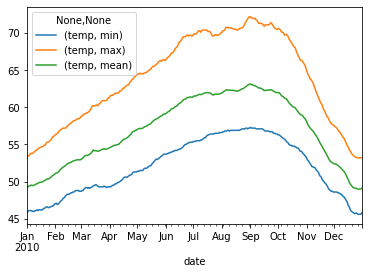

In [41]:
df_daily.plot()

In [42]:
from vega_datasets import data
s_weather = data.seattle_weather()

In [43]:
s_weather

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,fog
1457,2015-12-28,1.5,5.0,1.7,1.3,fog
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


1. Which year and month combination has the highest amount of precipitation?
2. Visualize the amount of monthly precipitation over time.
3. Visualize the amount of wind over time. Choose a time interval you think is appropriate.
4. Which year-month combination is the windiest?
5. What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)
6. In which month does it rain the most?
7. Which month has the most number of days with a non-zero amount of precipitation?

In [44]:
s_weather.date = pd.to_datetime(s_weather.date)

In [45]:
s_weather.dtypes

date             datetime64[ns]
precipitation           float64
temp_max                float64
temp_min                float64
wind                    float64
weather                  object
dtype: object

In [46]:
s_weather = s_weather.set_index('date').sort_index()

In [48]:
df = s_weather.copy()

In [58]:
df_month = df.resample('M').sum()

In [59]:
df_month.precipitation.idxmax().strftime('%Y'), df_month.precipitation.idxmax().strftime('%B'),df_month.precipitation.max()

('2015', 'December', 284.5)

<AxesSubplot:xlabel='date'>

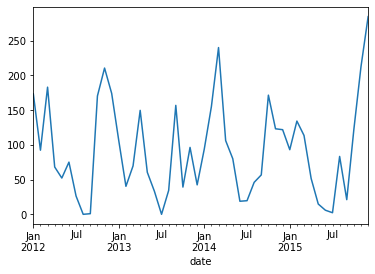

In [60]:
df_month.precipitation.plot()

3. Visualize the amount of wind over time. Choose a time interval you think is appropriate.

In [62]:
df_monthly_means = df.resample('M').mean()

<AxesSubplot:xlabel='date'>

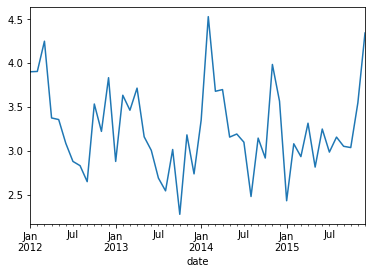

In [63]:
df_monthly_means.wind.plot()

In [64]:
df_monthly_means.wind.idxmax().strftime('%B %Y'),df_monthly_means.wind.max()

('February 2014', 4.5285714285714285)

5. What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In [77]:
df

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...
2015-12-27,8.6,4.4,1.7,2.9,fog
2015-12-28,1.5,5.0,1.7,1.3,fog
2015-12-29,0.0,7.2,0.6,2.6,fog


In [82]:
df['sunny'] = df.weather.apply(lambda x: 1 if x == 'sun' else 0)

In [84]:
df = df.resample('Y').sunny.sum()

In [86]:
# 2014 sunniest year

6. In which month does it rain the most?

In [141]:
df = s_weather.copy()

In [142]:
df['rain'] = df.weather.apply(lambda x: 1 if x == 'rain' else 0)

In [143]:
df['month_name'] = df.index.month_name()

In [144]:
df.groupby('month_name').rain.sum().sort_values(ascending=False)

month_name
February     40
March        37
January      35
November     25
December     23
April        20
October      20
June         19
May          16
July         14
August        6
September     4
Name: rain, dtype: int64

7. Which month has the most number of days with a non-zero amount of precipitation?

In [145]:
df['prec'] = df.precipitation.apply(lambda x: 1 if x > 0 else 0)

In [147]:
df.groupby('month_name').prec.sum().sort_values(ascending=False)

month_name
December     81
February     73
March        73
November     71
January      66
October      61
April        59
June         37
September    35
May          34
August       22
July         11
Name: prec, dtype: int64

In [170]:
flights = data.flights_20k()

1. Convert any negative delays to 0.
2. Which hour of the day has the highest average delay?
3. Does the day of the week make a difference in the delay amount?
4. Does the month make a difference in the delay amount?

In [171]:
flights.date = pd.to_datetime(flights.date)

In [172]:
flights = flights.set_index('date').sort_index()

In [173]:
flights.delay = flights.delay.apply(lambda x: 0 if x < 0 else x)

In [174]:
flights

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI
2001-01-01 06:30:00,0,251,MDW,STL
2001-01-01 07:00:00,0,361,OAK,ONT
2001-01-01 07:00:00,0,303,MSY,HOU
...,...,...,...,...
2001-03-31 21:02:00,26,303,MSY,HOU
2001-03-31 21:05:00,0,318,FLL,JAX
2001-03-31 21:05:00,0,451,MCI,IND


In [184]:
flights['hour'] = flights.index.hour

In [185]:
flights

,delay,distance,origin,destination,hour
date,,,,,
2001-01-01 00:01:00,14,405,MCI,MDW,0
2001-01-01 06:20:00,0,491,BNA,MCI,6
2001-01-01 06:30:00,0,251,MDW,STL,6
2001-01-01 07:00:00,0,361,OAK,ONT,7
2001-01-01 07:00:00,0,303,MSY,HOU,7
...,...,...,...,...,...
2001-03-31 21:02:00,26,303,MSY,HOU,21
2001-03-31 21:05:00,0,318,FLL,JAX,21
2001-03-31 21:05:00,0,451,MCI,IND,21


In [190]:
flights.groupby('hour').delay.mean().sort_values()

hour
5       0.513514
6       2.494856
7       3.071932
8       4.030483
9       5.002504
10      5.850953
11      7.361495
12      9.214341
14     10.747320
13     11.453311
15     13.137592
17     13.199580
16     13.881068
18     14.514218
19     16.256557
20     17.889778
21     21.626768
22     32.704607
23     65.353846
0     127.916667
1     170.000000
3     302.500000
Name: delay, dtype: float64

In [193]:
flights['day'] = flights.index.day_name()

In [194]:
flights.groupby('day').delay.mean()

day
Friday       17.757596
Monday        7.165772
Saturday      8.431498
Sunday       10.413542
Thursday     12.821322
Tuesday       9.410866
Wednesday    11.032478
Name: delay, dtype: float64

In [195]:
flights['month'] = flights.index.month

In [196]:
flights.groupby('month').delay.mean()

month
1    11.301592
2    12.306106
3     9.875287
Name: delay, dtype: float64